In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.mixture import GaussianMixture

# Load the Wine dataset
wine = load_wine()
X = wine.data[:, [0, 6]]  # Consider only two features for visualization purposes
y = wine.target
target_names = wine.target_names

In [2]:

# Fit the Gaussian Mixture Model using Expectation-Maximization
n_components = 3
gmm = GaussianMixture(n_components=n_components, random_state=0)
gmm.fit(X)

GaussianMixture(n_components=3, random_state=0)

In [3]:

# Print the parameters of the learned GMM
print("GMM weights:", gmm.weights_)
print("GMM means:", gmm.means_)
print("GMM covariances:", gmm.covariances_)

GMM weights: [0.29175965 0.31373859 0.39450176]
GMM means: [[13.08528126  0.80631445]
 [12.17236014  1.98490559]
 [13.59669926  2.96900616]]
GMM covariances: [[[ 0.31363211 -0.00908256]
  [-0.00908256  0.09199873]]

 [[ 0.19799278 -0.03144313]
  [-0.03144313  0.24023287]]

 [[ 0.36564239  0.00295491]
  [ 0.00295491  0.26498592]]]


In [4]:

# Generate samples from the learned GMM
n_samples_gen = len(X)
X_generated, y_generated = gmm.sample(n_samples_gen)

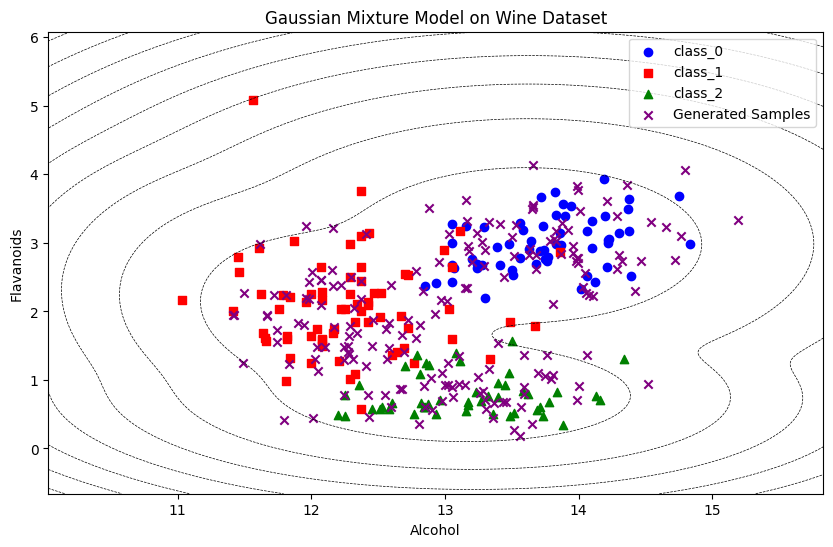

In [9]:


# Plot the original data and the GMM fit
plt.figure(figsize=(10, 6))
colors = ['blue', 'red', 'green']
markers = ['o', 's', '^']
# Plot the original data points
for target in range(len(target_names)):
    plt.scatter(X[y == target, 0], X[y == target, 1], color=colors[target], 
                marker=markers[target], label=target_names[target])

# Plot the generated data points
plt.scatter(X_generated[:, 0], X_generated[:, 1], 
            color='purple', marker='x', label='Generated Samples')
# Plot the GMM fit
x_grid = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 500)
y_grid = np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 500)
X_grid, Y_grid = np.meshgrid(x_grid, y_grid)
Z = gmm.score_samples(np.array([X_grid.ravel(), Y_grid.ravel()]).T)
Z = Z.reshape(X_grid.shape)
plt.contour(X_grid, Y_grid, Z, levels=10, colors='black', linewidths=0.5)

plt.title('Gaussian Mixture Model on Wine Dataset')
plt.xlabel('Alcohol')
plt.ylabel('Flavanoids')
plt.legend()
plt.show()
